Mounted at /content/gdrive
Epoch 1/30
10/10 [==============================] - 39s 3s/step - loss: 6.3821 - accuracy: 0.0934 - val_loss: 6.0236 - val_accuracy: 0.3385
Epoch 2/30
10/10 [==============================] - 33s 3s/step - loss: 4.7238 - accuracy: 0.1661 - val_loss: 5.8051 - val_accuracy: 0.3769
Epoch 3/30
10/10 [==============================] - 33s 3s/step - loss: 4.0272 - accuracy: 0.2578 - val_loss: 4.9487 - val_accuracy: 0.3769
Epoch 4/30
10/10 [==============================] - 33s 3s/step - loss: 3.6989 - accuracy: 0.2630 - val_loss: 4.5979 - val_accuracy: 0.3769
Epoch 5/30
10/10 [==============================] - 33s 3s/step - loss: 3.5189 - accuracy: 0.2630 - val_loss: 4.3100 - val_accuracy: 0.3769
Epoch 6/30
10/10 [==============================] - 33s 3s/step - loss: 3.3291 - accuracy: 0.3131 - val_loss: 4.1683 - val_accuracy: 0.4077
Epoch 7/30
10/10 [==============================] - 33s 3s/step - loss: 3.0733 - accuracy: 0.3633 - val_loss: 3.8731 - val_accuracy: 

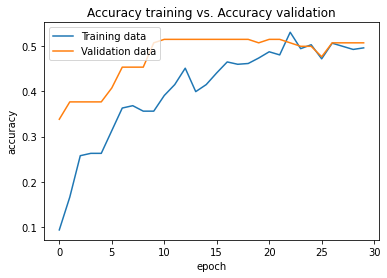

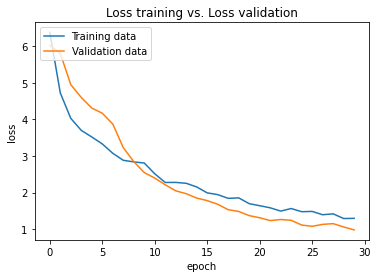

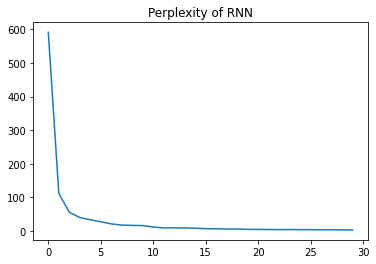

In [1]:
import numpy as np
import math
import statistics
import tensorflow as tf
import string
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
from tensorflow.python.framework import ops
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing


# We mount our Google Drive that contains the datasets
drive.mount('/content/gdrive')



#### The function for reading and parsing file
def read_seq(sequence):
  f = open(sequence, 'r')
  train = []
  trainlabel = []

    # Reading file and extracting paths and labels
  with open(sequence, 'r') as File:
    infoFile = File.readlines() # Reading all the lines from File
    count = 0
      
    for line in infoFile: #Reading line-by-line and spliting them
        
      split_line = line.split() 
      
      # training data addin
      charList = list(split_line[1])
      seq = []
          
      # if for some reason the protein sequence is less than 1000 char long
      if len(charList) < 900:
        for i in range(len(charList)):
          seq.append(ord(charList[i]) - ord('A') + 1)
            
        while len(seq) < 900:
          seq.append(0)
            
        # grab the labels and convert seq into a one hot encoding of 21
        if seq[len(seq)-1] > 20:
            seq[len(seq)-1] = 20

        if split_line[0] == 'delta':
          continue
        elif split_line[0] == 'reg':
          trainlabel.append(0.0)
        elif split_line[0] == 'beta':
          trainlabel.append(1.0)
        elif split_line[0] == 'alpha':
          trainlabel.append(2.0)


        seq = tf.one_hot(seq,21)
        train.append(seq)

        seq = []

      else:
        for i in range(900): # convert each letter into an int
          seq.append(ord(charList[i]) - ord('A') + 1)
            
          # grab the labels and convert seq into a one hot encoding of 21
        if seq[len(seq)-1] > 20:
            seq[len(seq)-1] = 20


        if split_line[0] == 'delta':
          continue
        elif split_line[0] == 'reg':
          trainlabel.append(0.0)
        elif split_line[0] == 'beta':
          trainlabel.append(1.0)
        elif split_line[0] == 'alpha':
          trainlabel.append(2.0)

        seq = tf.one_hot(seq,21)
        train.append(seq)

        seq = []

      count += 1
    
  return train, trainlabel




############################## use pretrained model to generate sequences that can be read by THIS model #################################################

x_train, y_train = read_seq('/content/gdrive/My Drive/proteinStuff/train.txt')
x_test, y_test = read_seq('/content/gdrive/My Drive/proteinStuff/test.txt')


# convert data read 
y_train = ops.convert_to_tensor(y_train, dtype=tf.float32)
y_test = ops.convert_to_tensor(y_test, dtype=tf.float32)


x_train = ops.convert_to_tensor(x_train, dtype=tf.float32)
x_test = ops.convert_to_tensor(x_test, dtype=tf.float32)



'''
model = keras.Sequential()
#model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(3))'''

'''
METRICS = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"), # computes precision of predictions w/ regards to the label
    keras.metrics.Recall(name="recall"),# computes recall: examines true positive, false negative, false_positives, and true_negatives and calls combined with sample weights
    keras.metrics.AUC(name="auc"), # Area Under Curve via Riemann sum: The area under the ROC-curve is therefore computed using the height of the recall values by the false positive rate, while the area under the PR-curve is the computed using the height of the precision values by the recall.
]'''

# load model and test it against the COVID variants
model = keras.models.load_model('/content/gdrive/My Drive/updated_model_09-08-2021') # this model is just filler for now
historyMod = model.fit(x=x_train, y=y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))


# We print out a summary of our model
model.summary()

# We plot results of the training model
plt.plot(historyMod.history['accuracy'], label='Training data')
plt.plot(historyMod.history['val_accuracy'], label='Validation data')
plt.title('Accuracy training vs. Accuracy validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="upper left")
plt.show()

# We plot the loss
plt.plot(historyMod.history['loss'], label='Training data')
plt.plot(historyMod.history['val_loss'], label='Validation data')
plt.title('Loss training vs. Loss validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc="upper left")
plt.show()

# This portion takes care of the perplexity plotting
perplexity = tf.exp(historyMod.history['loss'])
plt.plot(perplexity)
plt.title('Perplexity of RNN')
plt.show()




######################### the next step would be for the model to generate the next 900 amino acids and see if it can be recognized as a COVID variant

